# IBM Data Science Elite

# Unsupervised Clustering using LDA

This notebook demonstrates how unsupervised clustering can be used to find dominant topics/clusters in a corpus of documents.

We will use an unsupervised clustering algorithm called [Latent Dirichlet Allocation](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation) (LDA) for finding clusters. For an intuitive explanation of the algorithm, please watch this [video](https://www.youtube.com/watch?v=3mHy4OSyRf0). 

We will use a python package called [gensim](https://radimrehurek.com/gensim/) to implement LDA and [pyLDAvis](https://github.com/bmabey/pyLDAvis) to visualize the topic clusters. 

### Load and install necessary packages

In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# !pip install --user gensim pyLDAvis wordlcoud

In [3]:
# nltk.download('wordnet')
# nltk.download('stopwords')

### Load dataset
We are going to use a dataset available with scikit-learn that is various documents belonging to 20 news groups. 

In [4]:
docs = pd.read_csv('../datasets/20newsgroups.csv')

docs.head()

text
0  Well i'm not sure about the story nad it did s...
1  \n\n\n\n\n\n\nYeah, do you expect people to re...
2  Although I realize that principle is not one o...
3  Notwithstanding all the legitimate fuss about ...
4  Well, I will have to change the scoring on my ...

# NLP Pre-processing

Before we feed all the documents into our machine learning model, we have to pre-process the documents i.e., remove common words like 'the', 'and' etc called stop words, perform word normalization like stemming or lemmatization. We also do phrase modeling. Finally, each document is converted into a list of tokens which is later converted into a numeric vector.

### Load NLTK stop words and custom stop words list

In [5]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to /user-
[nltk_data]     home/1002/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
with open('../datasets/stopwords.txt') as f:
    stop_words += f.read().split('\n')

In [7]:
stop_words = set(stop_words)

### Tokenization

In [10]:
!pip install gensim

    100% |████████████████████████████████| 23.6MB 5.3kB/s eta 0:00:01972kB 43.2MB/s eta 0:00:0113% |████▌                           | 3.3MB 42.4MB/s eta 0:00:01██████▋                        | 5.6MB 38.5MB/s eta 0:00:01   33% |██████████▊                     | 8.0MB 37.1MB/s eta 0:00:01          | 10.1MB 36.4MB/s eta 0:00:01��██               | 12.5MB 36.0MB/s eta 0:00:01��███            | 14.8MB 43.0MB/s eta 0:00:01██         | 16.9MB 33.5MB/s eta 0:00:01███████████████████▏     | 19.3MB 39.1MB/s eta 0:00:01ta 0:00:01
    100% |████████████████████████████████| 133kB 606kB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 515kB/s eta 0:00:01
    100% |████████████████████████████████| 5.1MB 24kB/s  eta 0:00:01.1MB/s eta 0:00:01��███████████▍         | 3.6MB 38.3MB/s eta 0:00:01
  Running setup.py bdist_wheel for smart-open ... - \ done
  Stored in directory: /user-home/1002/.cache/pip/wheels/23/00/44/e5b939f7a80c04e32297dbd6d96fa3065af89ecf57e2b5f89f
  Running setup.

In [11]:
from gensim.parsing import preprocessing as pp

pp_list = [
    lambda x: x.lower(),
    pp.strip_tags,
    pp.strip_multiple_whitespaces,
    pp.strip_punctuation,
    pp.strip_short
          ]

def tokenizer(line):
    """ Applies the following steps in sequence:
        Converts to lower case,
        Strips tags (HTML and others),
        Strips multiple whitespaces,
        Strips punctuation,
        Strips short words(min lenght = 3),
        --------------------------
        :param line: a document
        
        Returns a list of tokens"""
    
    tokens = pp.preprocess_string(line, filters=pp_list)
    return tokens

### Apply it on our dataset

In [12]:
%%time

train_texts = []

for line in docs['text']:
    train_texts.append(tokenizer(line))

CPU times: user 3.77 s, sys: 66.9 ms, total: 3.83 s
Wall time: 3.83 s


In [13]:
docs['tokens'] = train_texts

docs.head()

text  \
0  Well i'm not sure about the story nad it did s...   
1  \n\n\n\n\n\n\nYeah, do you expect people to re...   
2  Although I realize that principle is not one o...   
3  Notwithstanding all the legitimate fuss about ...   
4  Well, I will have to change the scoring on my ...   

                                              tokens  
0  [well, not, sure, about, the, story, nad, did,...  
1  [yeah, you, expect, people, read, the, faq, et...  
2  [although, realize, that, principle, not, one,...  
3  [notwithstanding, all, the, legitimate, fuss, ...  
4  [well, will, have, change, the, scoring, playo...

## Visualize word cloud of all tokens

In [14]:
import collections

unigram_counter = collections.Counter(x for xs in train_texts for x in set(xs))

for stop_word in stop_words:
    if stop_word in unigram_counter:
        unigram_counter.pop(stop_word)

unigram_counter.most_common(10)

[('people', 1818),
 ('time', 1745),
 ('make', 1399),
 ('work', 1032),
 ('problem', 1027),
 ('find', 960),
 ('system', 954),
 ('point', 909),
 ('made', 823),
 ('case', 771)]

In [15]:
# from PIL import Image

# image_mask = np.array(Image.open('cc_mask2.png'))

In [17]:
!pip install wordcloud

    100% |████████████████████████████████| 358kB 252kB/s eta 0:00:01


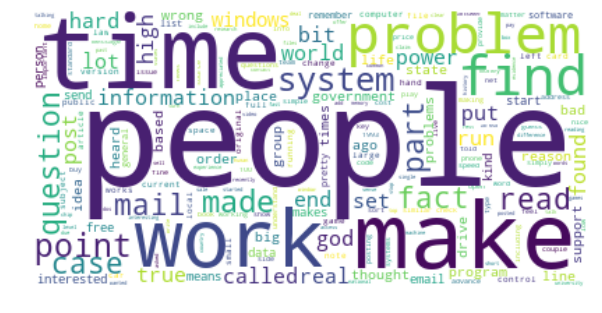

In [18]:
from wordcloud import WordCloud, STOPWORDS

# For Mac
# wc = WordCloud(font_path="/Library/Fonts/DIN Condensed Bold.ttf", background_color='white', mask=image_mask, random_state=42)
wc = WordCloud(background_color='white', random_state=42)

plt.figure(figsize=(10, 8))
plt.imshow(wc.fit_words(unigram_counter), interpolation='bilinear')
plt.axis("off")
plt.savefig('../datasets/total_wordcloud.png')
plt.show()

## Phrase Modeling

Identify the most common trigrams and bigrams. It is learned according to the formula mentioned [here](https://radimrehurek.com/gensim/models/phrases.html).

In [19]:
%%time

import gensim
bigram = gensim.models.Phrases(train_texts)
bigram_phraser = gensim.models.phrases.Phraser(bigram)
tokens_ = bigram_phraser[train_texts]
trigram = gensim.models.Phrases(tokens_)
trigram_phraser = gensim.models.phrases.Phraser(trigram)

CPU times: user 54.6 s, sys: 303 ms, total: 54.9 s
Wall time: 54.9 s


In [20]:
# bigram_phraser_file = '../datasets/bigram_phraser'
# bigram_phraser.save(bigram_phraser_file)

# trigram_phraser_file = '../datasets/trigram_phraser'
# trigram_phraser.save(trigram_phraser_file)

Let's check if our model has learned any phrases on our data

In [21]:
trigram_phraser[['for', 'credit', 'card']]

['for', 'credit_card']

In [22]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def process_texts(tokens):
    """Removes stop words, Stemming,
       Lemmatization assuming verb"""
    
    tokens = [token for token in tokens if token not in stop_words]
    tokens = bigram_phraser[tokens]
    tokens = trigram_phraser[tokens]
#     tokens = [stemmer.stem(token) for token in tokens]
    tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens]
    return tokens

In [27]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /user-
[nltk_data]     home/1002/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [28]:
%%time

final_texts = []

for line in train_texts:
    final_texts.append(process_texts(line))

CPU times: user 18.3 s, sys: 175 ms, total: 18.5 s
Wall time: 18.6 s


In [29]:
docs['final_tokens'] = final_texts

docs.head()

text  \
0  Well i'm not sure about the story nad it did s...   
1  \n\n\n\n\n\n\nYeah, do you expect people to re...   
2  Although I realize that principle is not one o...   
3  Notwithstanding all the legitimate fuss about ...   
4  Well, I will have to change the scoring on my ...   

                                              tokens  \
0  [well, not, sure, about, the, story, nad, did,...   
1  [yeah, you, expect, people, read, the, faq, et...   
2  [although, realize, that, principle, not, one,...   
3  [notwithstanding, all, the, legitimate, fuss, ...   
4  [well, will, have, change, the, scoring, playo...   

                                        final_tokens  
0  [story, nad, bias, disagree, statement, media,...  
1  [expect, people, read, faq, accept, hard_athei...  
2  [realize, principle, strongest, point, questio...  
3  [notwithstanding, legitimate, fuss, proposal, ...  
4  [change, score, playoff_pool, time, post, scor...

## Topic Modeling

### Create a gensim dictionary and corpus

In [30]:
from gensim.corpora import Dictionary

# Create a dictionary(vocab) with all tokens
dictionary = Dictionary(final_texts)

# Filter tokens which appear less than 5 times,
# and those which appear more than 50% of the time.
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Convert our documents to bag-of-words
corpus = [dictionary.doc2bow(text) for text in final_texts]

In [31]:
# dictionary_file_path = '../datasets/dictionary.dict'
# dictionary.save(dictionary_file_path)

### Train LDA Model

In [32]:
# import logging

# logger = logging.getLogger()
# logger.setLevel(logging.DEBUG)
# logging.debug("test")

In [33]:
%%time

from gensim.models import LdaModel

# Set random seed to reproduce results
np.random.seed(42)

NUM_TOPICS = 10

# Caution: the below parameters will take a long time to run
# First run it with default parameters
passes = 20
iterations = 400
eval_every = 50

# Increase the number of passes to get better results. But it'll takes more time
ldamodel = LdaModel(corpus=corpus, num_topics=NUM_TOPICS, id2word=dictionary)#, 
#                     passes=passes,
#                    iterations=iterations,
#                    eval_every=eval_every)

CPU times: user 15.2 s, sys: 1min 17s, total: 1min 32s
Wall time: 9.91 s


### Save the trained model

In [34]:
# ldamodel.save('10_clusters_full_preprocess_gensim.model')

In [35]:
# from gensim.models import LdaModel

# ldamodel = LdaModel.load('10_clusters_full_preprocess_gensim.model')

### Visualize the topic clusters

In [37]:
!pip install pyLDAvis

    100% |████████████████████████████████| 1.6MB 74kB/s  eta 0:00:01
  Running setup.py bdist_wheel for pyLDAvis ... - \ done
  Stored in directory: /user-home/1002/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [38]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

prepared_viz = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)

In [39]:
import pyLDAvis

pyLDAvis.display(prepared_viz)

## WordClouds for each topic

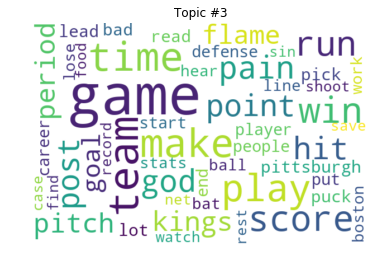

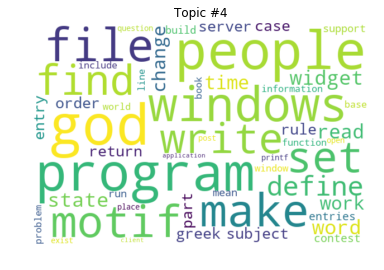

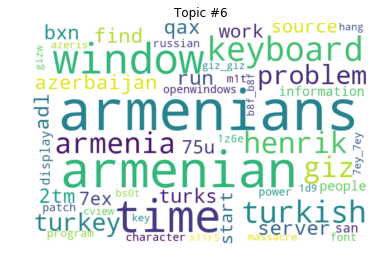

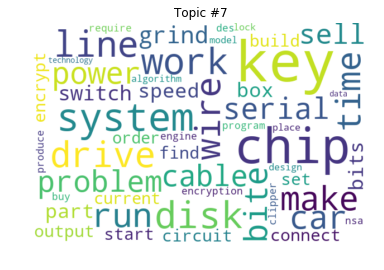

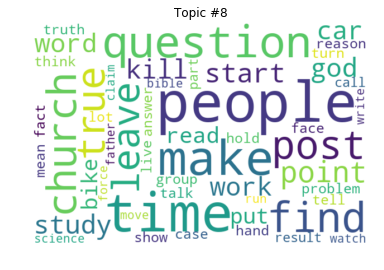

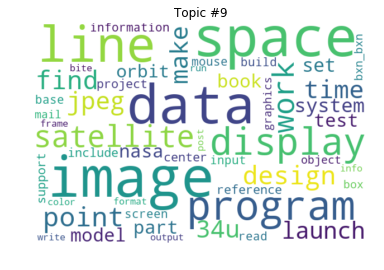

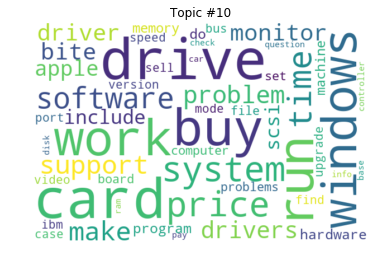

In [40]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white', max_font_size=100, width=600, height=400)

for t in range(ldamodel.num_topics):
    plt.figure(figsize=(6, 5))
    plt.imshow(wc.fit_words(dict(ldamodel.show_topic(t, 50))), interpolation='bilinear')
    plt.axis("off")
    plt.title("Topic #" + str(t+1))
    plt.show()

### Find the dominant topics for each document

In [41]:
%%time

doc_topics = []
top_topic_ids = []
dominant_topic_prob = []

for index, corp in enumerate(corpus):
    # Get the document-topic distribution for each document and sort it
    doc_topic_dist = ldamodel.get_document_topics(corp, minimum_probability=0)
    _srtd = sorted(doc_topic_dist, key=lambda x: x[1], reverse=True)
    top, score = _srtd[0]
    top_topic_ids.append(top+1)
    doc_topic = [tup[1] for tup in doc_topic_dist]
    dominant_topic_prob.append(max(doc_topic))
    doc_topics.append(doc_topic)

CPU times: user 12.5 s, sys: 1min 9s, total: 1min 22s
Wall time: 7.56 s


## Find top documents for each topic

In [42]:
doc_topics_arr = np.asarray(doc_topics)

documents = docs['text']
NUM_DOCUMENTS = 20
top_documents_list = []
for topic_ in range(NUM_TOPICS):
    doc_ids = np.argsort(doc_topics_arr[:,topic_])[:-NUM_DOCUMENTS-1:-1]
    for doc_id in doc_ids:
        top_documents_list.append(((topic_ + 1), documents[doc_id]))
top_documents = pd.DataFrame(top_documents_list, columns=['topic_num', 'document'])
top_documents.to_csv('../datasets/top_documents.csv', index=False)

## Assign topic labels

In [43]:
topic_labels = {x:x for x in range(1, NUM_TOPICS+1)}

### Find the number of documents in each topic

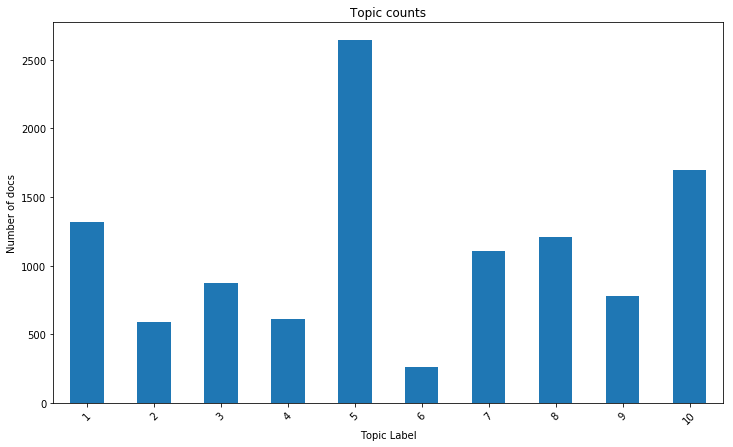

In [44]:
# plt.style.use('seaborn')
topics_count = pd.DataFrame(top_topic_ids, columns=['topic'])
topics_count = topics_count.reset_index().groupby('topic').count()
topics_count.reset_index(inplace=True)
topics_count['topic'] = topics_count['topic'].map(lambda x: topic_labels[x])
fig, ax = plt.subplots(figsize=(12, 7))
topics_count.plot(kind='bar', x='topic', y='index', ax=ax, rot=45)
ax.set(title='Topic counts', xlabel='Topic Label', ylabel='Number of docs')
ax.legend().set_visible(False)
plt.show()

## Export Files

### We export the original file with annotations, and a file for analyzing topics

In [45]:
top_word = {}
out_file = open('../datasets/topic_term_distributions.csv', 'w')
out_file.write('topic,topic_label,word_index,weight,word\n')
for i in range(NUM_TOPICS):
    topic_terms = ldamodel.get_topic_terms(i)
    top_word[i+1] = dictionary.id2token[topic_terms[0][0]]
    for term in topic_terms:
        out_file.write(str(i+1) + ',' + str(topic_labels[i+1]) + ',' + str(term[0]) + ',' + str(term[1]) + ',' + str(dictionary.id2token[term[0]]) + '\n')
out_file.close()

In [46]:
automatic_labels = [str(top_word[x]) for x in top_topic_ids]
top_topic_labels = [str(topic_labels[x]) for x in top_topic_ids]

docs.drop(['tokens', 'final_tokens'], axis=1, inplace=True)
docs['dominant_topic'] = top_topic_ids
docs['dominant_topic_probability'] = dominant_topic_prob
docs['automatic_topic_label'] = automatic_labels
docs['topic_label'] = top_topic_labels #manually labeled
docs['topic_distribution_string'] = doc_topics
# docs.to_csv('../datasets/annotated_docs.csv', index=False)
docs.head()

text  dominant_topic  \
0  Well i'm not sure about the story nad it did s...               5   
1  \n\n\n\n\n\n\nYeah, do you expect people to re...               5   
2  Although I realize that principle is not one o...               8   
3  Notwithstanding all the legitimate fuss about ...               1   
4  Well, I will have to change the scoring on my ...               3   

   dominant_topic_probability automatic_topic_label topic_label  \
0                    0.921763                people           5   
1                    0.367196                people           5   
2                    0.444261                people           8   
3                    0.554172                  file           1   
4                    0.943744                  game           3   

                           topic_distribution_string  
0  [0.002041029, 0.061908923, 0.0020413122, 0.002...  
1  [0.004167657, 0.15773013, 0.21630946, 0.162772...  
2  [0.0030305583, 0.003030981, 0.0030310205, 0.00...  
3  [0.5541716, 0.02826937, 0.09034878, 0.00175473...  
4  [0.0062505817, 0.006250391, 0.9437441, 0.00625...

### Developed by Data Science Elite Team, IBM Analytics:
- Vinay Rao Dandin

This code is released under [DSX Local license](http://www14.software.ibm.com/cgi-bin/weblap/lap.pl?la_formnum=&li_formnum=L-KLSY-AV9MYE&title=IBM+Data+Science+Experience+Local&l=en)

Copyright (c) 2018 IBM Corporation